# Propositional Logic Experiment

In this notebook, we will test your skills on using the LNN in a propositional setting. You will be required to use your knowledge about per-node reasoning and bounds to complete the code and answer the query. Once you have evaluated the end result, [submit your answer](https://ibm.ent.box.com/notes/928968934657?s=42l32h0uno2ndq5o9omb7hl17dddpjuk) to become eligble for the [IBM Neuro-Symbolic AI Essentials](https://ibm.biz/nsai-essentials) Badge.

docs: 
https://ibm.github.io/LNN/introduction.html

And, Or - sometimes need add_data and sometimes don't

Implies - needs add_data

LNN symbolic structure - https://ibm.github.io/LNN/lnn/LNN.html

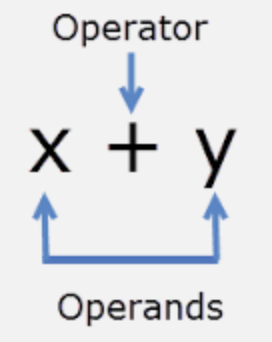

In [ ]:
# upward inference - evaluates operator, given two or more true operands
# downward inference - evaluates operand, given true in operator and true in other operands 

### Learning Outcomes

The [Propositional Logic](../0.%20Propositional%20Logic.ipynb) notebooks demonstrated logical reasoning to evaluate and inspect an LNN graph. This experiment will assess your ability to deconstruct a graph and infer truths for individual nodes. Completing the notebook provides the following learning outcomes:

- Omni-directional inference per-node
- Printing nodes to evaluate truths
- Querying information based on inferred truths

### Instructions

1. _Use_ the illustrations given as a guide on how to reason with an LNN graph

2. _Fill_ in code that will evaluate the correct truth values expected from performing logical inference

3. _Query_ the logical disjunction between nodes B, D and E

4. _Copy & paste_ the output of the result into the form under the `results` field 

### Propositional Inference

Recall that a proposition is any declarative sentence that allows you to associate a truth value with the atomic formulae. An LNN graph can hierarchically compose these propositions using logical connectives and reason over their respective truths. Evaluating a particular node requires an upward/downward inference pass.

Suppose that you are given the following LNN graph:


where the following beliefs are outputs from sensor information:
```
root: TRUE
A: 0.2
C: True
E: 0.3 - 0.7
```

Your task is to perform successive inference passes to obtain the truth value of a query node. 
> HINT: use the `node.print()` function as a guide to ensure that the LNN is returning the correct truths. 

The final query is to return the truth of a **disjunction** of the following propositions:

\begin{equation}(B, D, E)\end{equation}

> NB: use the provided function definition to help you extract out the correct truth value bounds

<center>
    <figure>
        <img src="../img/experiment/0/graph.png" width="400" />
        <figcaption>Figure 1. Propositional inference</figcaption>
    </figure>
</center>

Fill in the codeblock below to construct the graph and reason about all nodes:

In [5]:
from lnn import Propositions, Fact, And, Or, Implies
from lnn import Model, Loss, Direction

# Data
A, B, C, D, E = Propositions("A", "B", "C", "D", "E")
A.add_data((0.2, 0.2)) # not sure here <---
B.add_data((0.0, 1.0)) # B (not given)
C.add_data(Fact.TRUE)
# D.add_data((0.0, 1.0)) # D -(not given)
D.add_data(Fact.FALSE)
E.add_data((0.3, 0.7))

AND_1 = And(C, D)
OR = Or(AND_1, E)
IMPLIES = Implies(A, B)
AND_2 = And(IMPLIES, OR)

# query = And(Implies(A,B),Or(And(C,D),E))


AND_1.add_data(Fact.TRUE)
IMPLIES.add_data(Fact.TRUE)

# Knowledge 
model = Model()
#model.add_knowledge(AND_1)
model.add_knowledge(AND_2)

# Reasoning
# model.infer()
print('--- before using Loss ---')
AND_2.upward()
AND_2.print()
IMPLIES.downward()
IMPLIES.print()
# OR.upward()
# OR.print()
# AND_2.upward()
# AND_2.print()

print('--- after using Loss ---')
model.train(direction=Direction.UPWARD, losses=[Loss.CONTRADICTION])
AND_1.print(params=True)
IMPLIES.print()
OR.upward()
OR.print()
AND_2.upward()
AND_2.print()

--- before using Loss ---
OPEN And: ((A → B) ∧ ((C ∧ D) ∨ E))                      UNKNOWN (0.0, 1.0)

OPEN Implies: (A → B)                                       TRUE (1.0, 1.0)

--- after using Loss ---
OPEN And: (C ∧ D)                                           TRUE (1.0, 1.0)
params  α: 1.0,  β: 1.0,  w: [1. 0.]
OPEN Implies: (A → B)                                       TRUE (1.0, 1.0)

OPEN Or: ((C ∧ D) ∨ E)                                      TRUE (1.0, 1.0)

OPEN And: ((A → B) ∧ ((C ∧ D) ∨ E))                         TRUE (1.0, 1.0)



### Query
Finally, find the state of the **disjunction** between nodes `B`, `D` and `E` using the `query_state` method.

<center>
    <figure>
        <img src="../img/experiment/0/query.png" width="200" />
        <figcaption>Figure 5. Perform inference to find the disjunction between nodes B, D and E</figcaption>
    </figure>
</center>

In [3]:
query = model.query_state

AttributeError: 'Model' object has no attribute 'query_state'

<h2 style="color:#0f62fe"><strong>NSAI Essentials Submission</strong></h2>

- Run the codeblock below to extract the output of the query that was reasoned over. 
- The output from the cell, **including the quotation marks**, should be filled in the `result` field of the evaluation form.
- See the [NSAI Essentials description](https://ibm.box.com/s/42l32h0uno2ndq5o9omb7hl17dddpjuk) for more details on the submission.

In [ ]:
def format_result(node):
    round_off = lambda my_list: [float(f"{_:.1f}") for _ in my_list]
    return f"{node.state().name}: {tuple(round_off(node.get_data().tolist()))}"

format_result(query)

🎉 Congratulations on completing the first set of tutorials on propositional logic 🎉 

In [ ]:
# V2

In [ ]:
from lnn import Propositions, Fact, And, Or, Implies
from lnn import Model, Loss, Direction

# Data
A, B, C, D, E = Propositions("A", "B", "C", "D", "E")
A.add_data((0.2, 0.2)) # not sure here <---
B.add_data((0.0, 1.0)) # B (not given)
C.add_data(Fact.TRUE)
# D.add_data((0.0, 1.0)) # D -(not given)
D.add_data(Fact.FALSE)
E.add_data((0.3, 0.7))

AND_1 = And(C, D)
OR = Or(AND_1, E)
IMPLIES = Implies(A, B)
AND_2 = And(IMPLIES, OR)



AND_1.add_data(Fact.TRUE)
IMPLIES.add_data(Fact.TRUE)

# Knowledge 
model = Model()
#model.add_knowledge(AND_1)
model.add_knowledge(AND_2)

# Reasoning
# model.infer()
print('--- before using Loss ---')
AND_2.upward()
AND_2.print()
IMPLIES.downward()
IMPLIES.print()
# OR.upward()
# OR.print()
# AND_2.upward()
# AND_2.print()

print('--- after using Loss ---')
model.train(direction=Direction.UPWARD, losses=[Loss.CONTRADICTION])
AND_1.print(params=True)
IMPLIES.print()
OR.upward()
OR.print()
AND_2.upward()
AND_2.print()

In [ ]:
# V1 - version of classical reasoning (without models)

In [ ]:
from lnn import Propositions, Fact, And, Or, Implies
from lnn import Model, Loss, Direction

# Data
A, B, C, D, E = Propositions("A", "B", "C", "D", "E")
A.add_data((0.2, 0.2)) # not sure here <---
B.add_data((0.0, 1.0)) # B (not given)
C.add_data(Fact.TRUE)
D.add_data((0.0, 1.0)) # D -(not given)
E.add_data((0.3, 0.7))

# rules
AND_1 = And(C, D)
OR = Or(AND_1, E)
IMPLIES = Implies(A, B)
AND_2 = And(IMPLIES, OR)

IMPLIES.add_data(Fact.TRUE)

# reasoning
AND_1.upward()
AND_1.print()
IMPLIES.downward()
IMPLIES.print()
OR.upward()
OR.print()
AND_2.upward()
AND_2.print()